№1

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



df_2021 = pd.read_excel('Индекс счастья - данные 2015-2022 для ИДЗ.xlsx', sheet_name='2021')
df_2021 = df_2021[df_2021['Regional indicator']=='Middle East and North Africa']
df_2021 = df_2021[['Индекс счастья', 'Индекс социальной поддержки','Здоровье','Отношение к коррупции']]
df_2021.reset_index(drop=True, inplace=True)
df_2021


,Индекс счастья,Индекс социальной поддержки,Здоровье,Отношение к коррупции
0,7.157,0.939,73.503,0.753
1,6.647,0.862,69.495,0.722
2,6.561,0.844,67.333,0.589
3,6.494,0.891,66.603,0.684
4,6.106,0.843,66.900,0.736
5,5.410,0.827,62.300,0.667
6,4.948,0.822,67.199,0.776
7,4.918,0.560,66.208,0.801
8,4.887,0.802,66.005,0.752
9,4.854,0.746,60.583,0.875


In [9]:
scaler = MinMaxScaler(feature_range=(0, 10))
df_2021[['Индекс счастья', 'Индекс социальной поддержки','Здоровье','Отношение к коррупции']] = scaler.fit_transform(df_2021[['Индекс счастья', 'Индекс социальной поддержки','Здоровье','Отношение к коррупции']])
df_2021 = df_2021.round(3)
df_2021.reset_index(drop=True, inplace=True)
df_2021

,Индекс счастья,Индекс социальной поддержки,Здоровье,Отношение к коррупции
0,10.000,10.000,10.000,5.307
1,8.542,7.968,7.553,4.304
2,8.297,7.493,6.233,0.000
3,8.105,8.734,5.788,3.074
4,6.996,7.467,5.969,4.757
5,5.007,7.045,3.161,2.524
6,3.687,6.913,6.152,6.052
7,3.601,0.000,5.547,6.861
8,3.512,6.385,5.423,5.275
9,3.418,4.908,2.113,9.256


Построение гистограмм для случайно величины: Индекс счастья


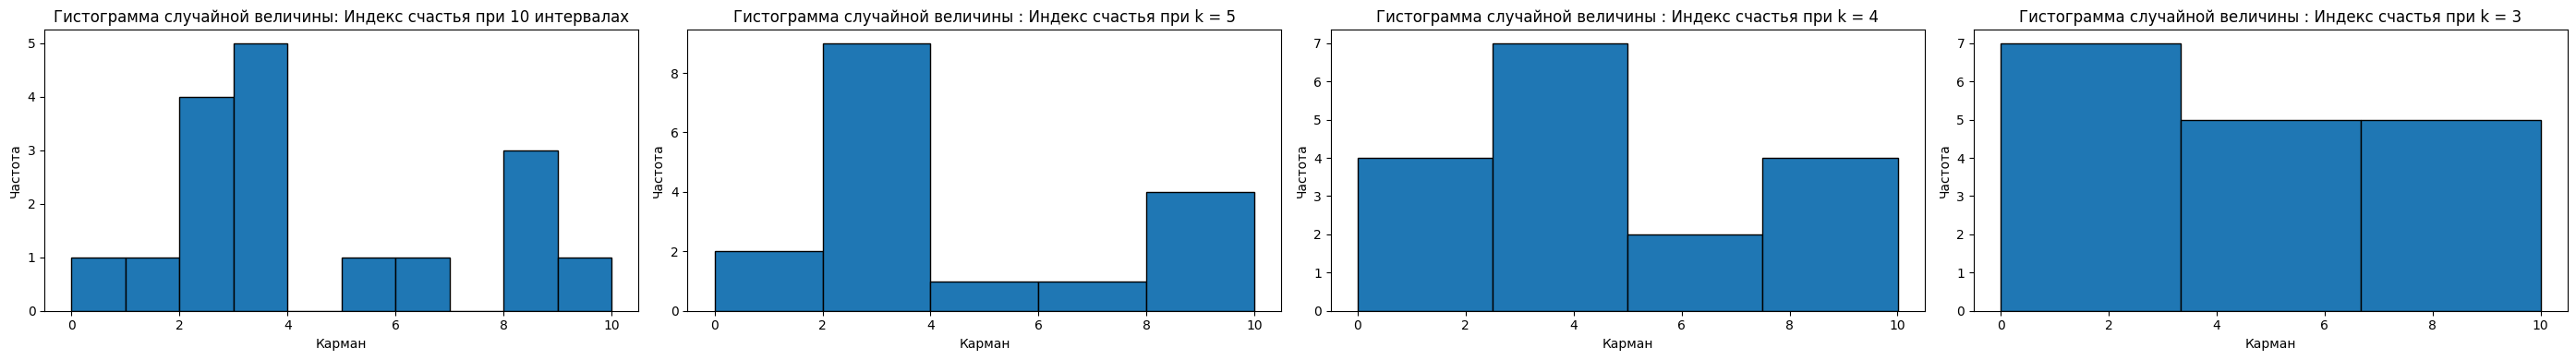

Построение гистограмм для случайно величины: Индекс социальной поддержки


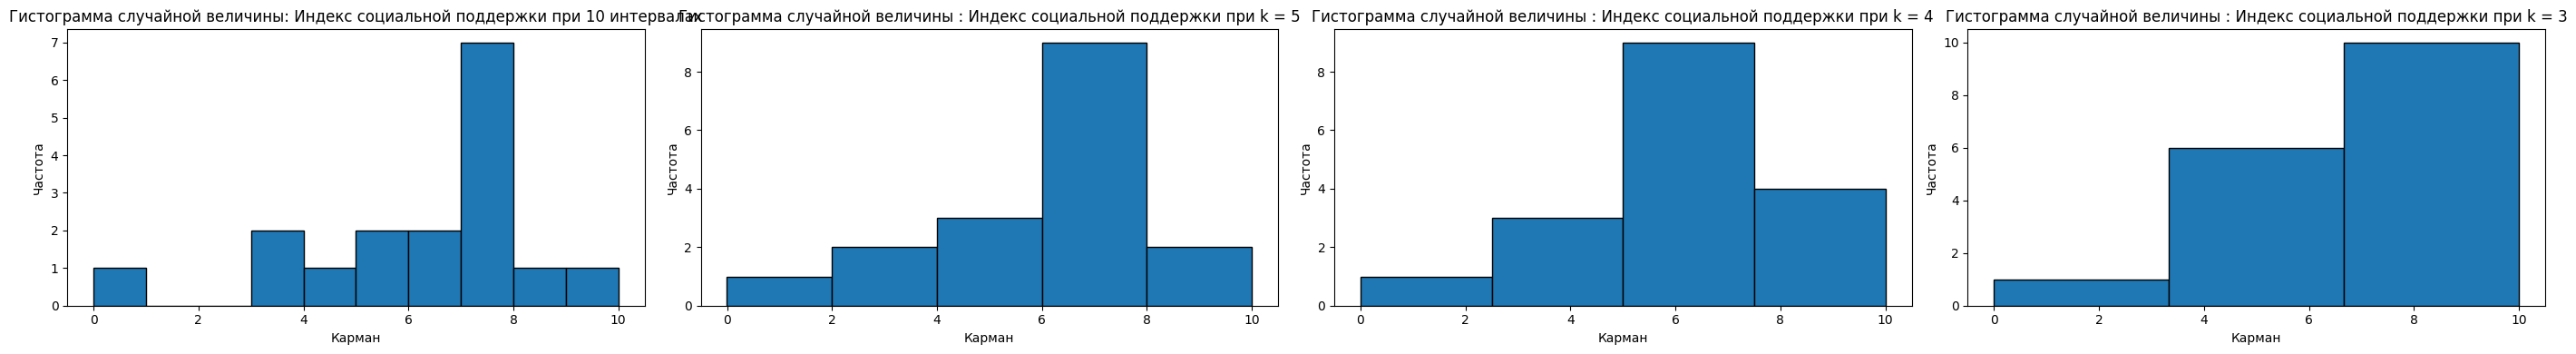

Построение гистограмм для случайно величины: Здоровье


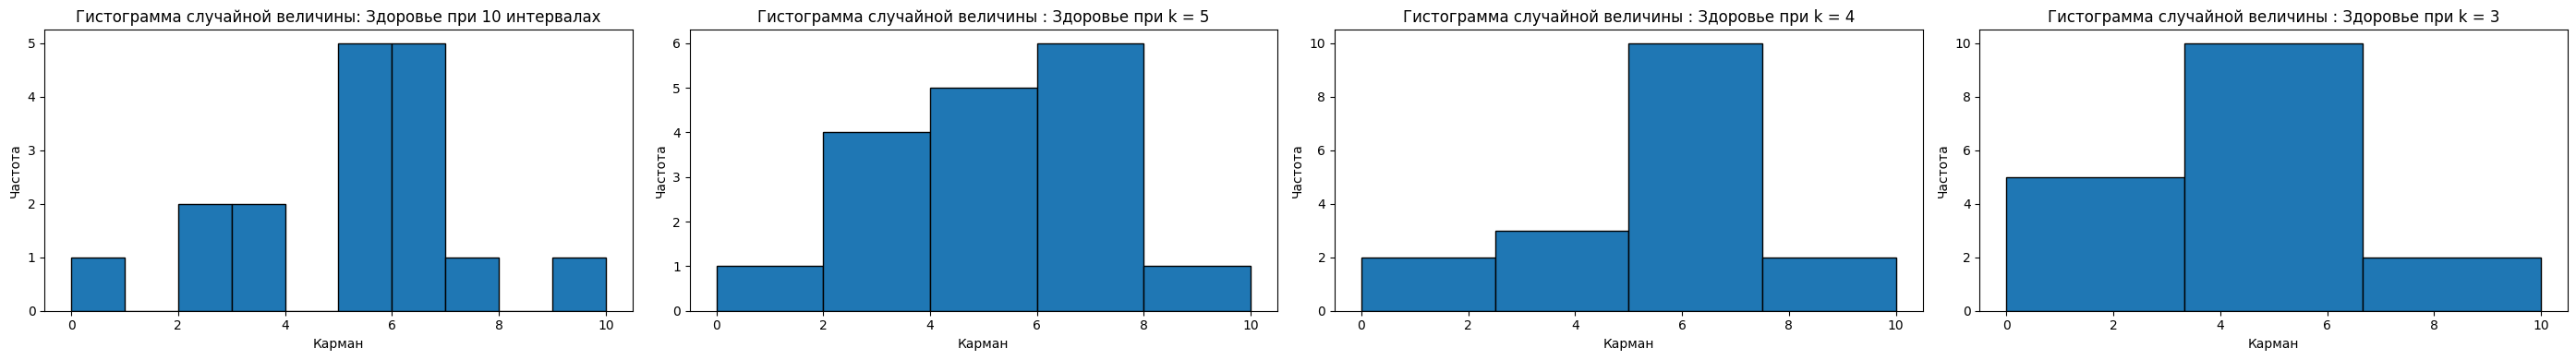

Построение гистограмм для случайно величины: Отношение к коррупции


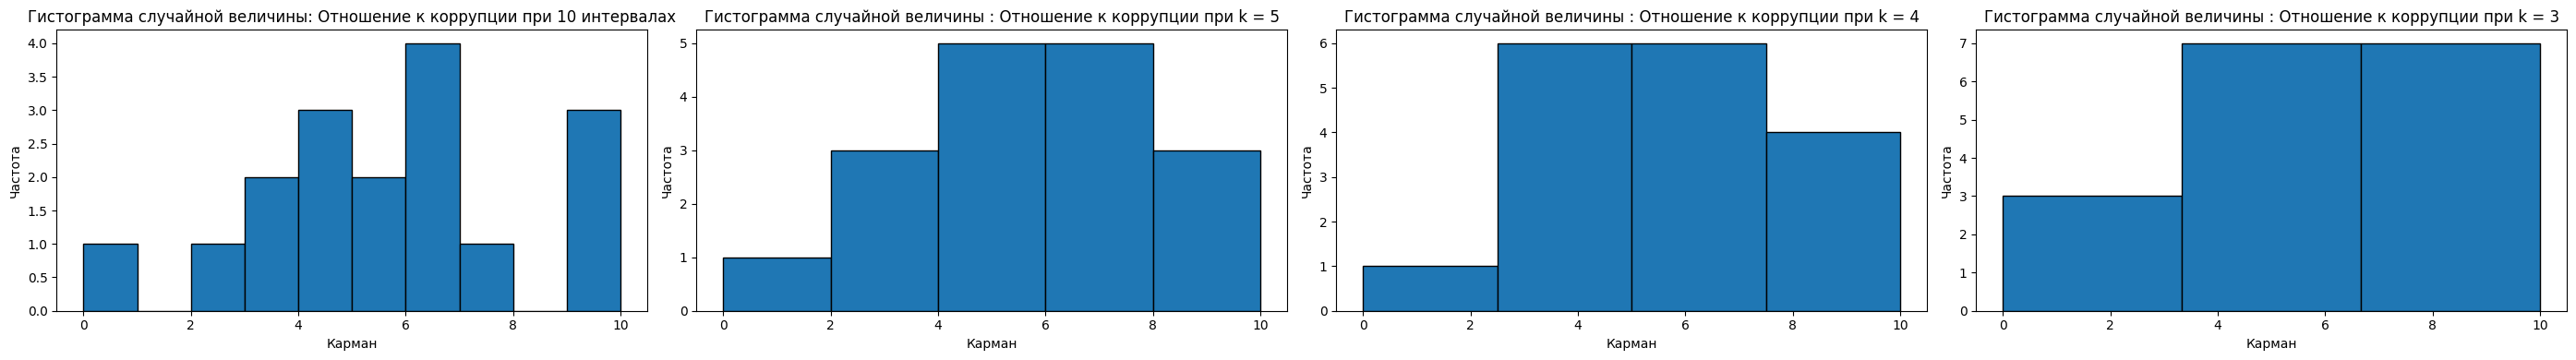

In [11]:
randomVar = ['Индекс счастья','Индекс социальной поддержки','Здоровье','Отношение к коррупции']

for X in randomVar:
    fig, axs = plt.subplots(1, 4, figsize=(28, 4))
    print(f'Построение гистограмм для случайно величины: {X}')

    # Построение гистограммы
    axs[0].hist(df_2021[X], edgecolor='black')
    axs[0].set_title(f"Гистограмма случайной величины: {X} при 10 интервалах")
    axs[0].set_xlabel('Карман')
    axs[0].set_ylabel('Частота')

    # Размер выборки
    n = len(df_2021[X])

    # Вычисление количества интервалов по формуле Стёрджесса
    k = int(1 + np.log2(n))

    maxValue = df_2021[X].max() + 0.0005
    minValue = df_2021[X].min() - 0.0005


    rangeOfDataSet = (maxValue - minValue)

    for j in range(3):

        # Вычисление ширины интервала
        width = (rangeOfDataSet / (k - j))

        # Создание списка границ интервалов
        bin_edges = np.arange(start=minValue, stop=maxValue+width, step=width)

        # Построение гистограммы
        axs[j+1].hist(df_2021[X], bins=bin_edges, edgecolor='black')
        axs[j+1].set_title(f"Гистограмма случайной величины : {X} при k = {k - j}")
        axs[j+1].set_xlabel('Карман')
        axs[j+1].set_ylabel('Частота')



    plt.tight_layout()
    plt.show()
